In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [15]:
# Analyse closing price of all the stocks
path = r'E:\Data Analysis\2-Time Series Data Analysis/individual_stocks_5yr'

In [16]:
company_list = ['AAPL_data.csv','AMZN_data.csv','GOOG_data.csv', 'MSFT_data.csv']

In [17]:
all_data = pd.DataFrame()
for file in company_list:
    current_df =pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])

In [18]:
all_data.shape

(4752, 7)

In [19]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [22]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [23]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [25]:
tech_list = all_data['Name'].unique()

In [26]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

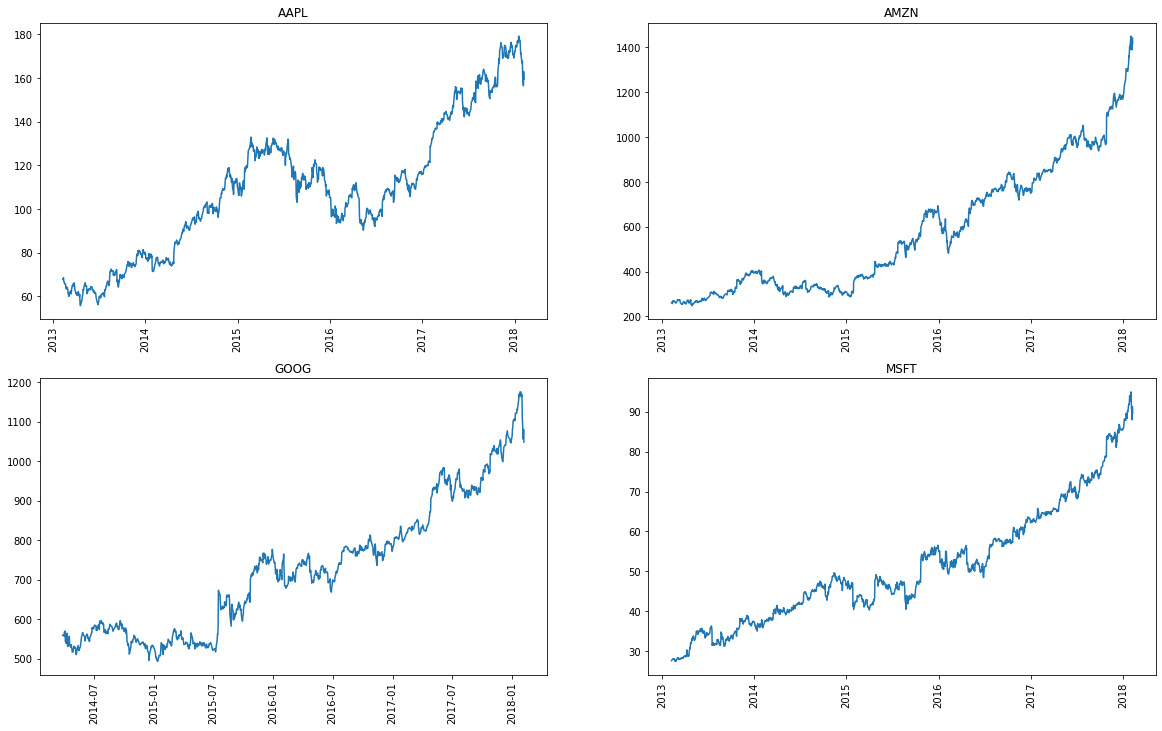

In [42]:
plt.figure(figsize = (20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    data_frame = all_data[all_data['Name']==company]
    plt.plot(data_frame['date'],data_frame['close'])
    plt.xticks(rotation = 'vertical')
    plt.title(company)

In [43]:
 data_frame

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [46]:
# Analyse the total volume of stock being traded each day
for company in tech_list:
    fig = px.line(data_frame, x = 'date', y = 'volume', title = company)
    fig.show()

In [90]:
# Analyse Daily price change in stock
Path = r'E:\Data Analysis\2-Time Series Data Analysis\individual_stocks_5yr'
company_list = ['AAPL_data.csv','AMZN_data.csv','GOOG_data.csv', 'MSFT_data.csv']
d_frame = pd.DataFrame()
for file in company_list:
    current_frame = pd.read_csv(Path+'/'+file)
    d_frame = pd.concat([current_frame,d_frame])
    



In [91]:
d_frame.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [92]:
d_frame['daily_price_change'] = d_frame['close']-d_frame['open']
d_frame.head()
d_frame.shape

(4752, 8)

In [93]:
d_frame['1 day percent return']= ((d_frame['daily_price_change'])/(d_frame['close']))*100

In [94]:
tech_list = d_frame['Name'].unique()
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

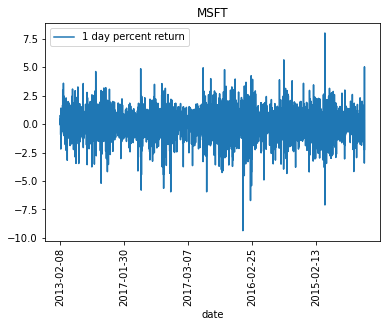

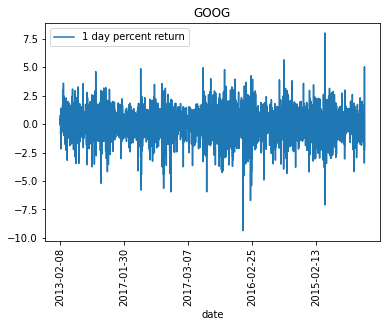

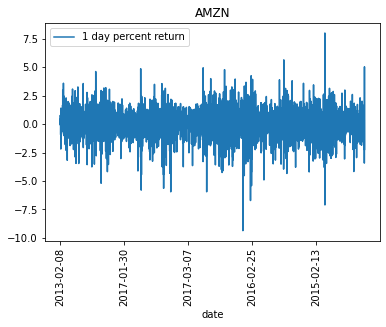

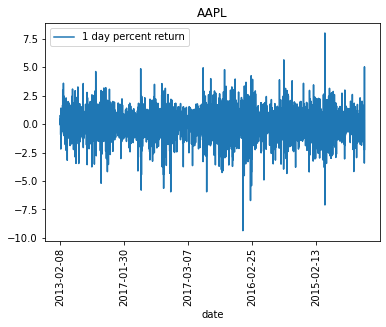

In [109]:
for company in tech_list:
    Figure = d_frame.plot(x = 'date', y = '1 day percent return', title = company)
    plt.xticks(rotation= 'vertical')


In [110]:
#Analyse mean of close feature
df2 = d_frame.copy()

In [112]:
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace = True)
df2

,open,high,low,close,volume,Name,daily_price_change,1 day percent return
date,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,0.200,0.725953
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,0.210,0.753769
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,0.000,0.000000
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,0.100,0.356761
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,0.120,0.427960
...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,0.615,0.366551
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,-5.500,-3.426791
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,-2.610,-1.667838


In [113]:
df2['2013-02-08':'2013-02-14']

,open,high,low,close,volume,Name,daily_price_change,1 day percent return
date,,,,,,,,
2013-02-08,27.3500,27.7100,27.3100,27.5500,33318306,MSFT,0.2000,0.725953
2013-02-11,27.6500,27.9200,27.5000,27.8600,32247549,MSFT,0.2100,0.753769
2013-02-12,27.8800,28.0000,27.7500,27.8800,35990829,MSFT,0.0000,0.000000
2013-02-13,27.9300,28.1100,27.8800,28.0300,41715530,MSFT,0.1000,0.356761
2013-02-14,27.9200,28.0600,27.8700,28.0400,32663174,MSFT,0.1200,0.427960
2013-02-08,261.4000,265.2500,260.5550,261.9500,3879078,AMZN,0.5500,0.209964
2013-02-11,263.2000,263.2500,256.6000,257.2100,3403403,AMZN,-5.9900,-2.328836
2013-02-12,259.1900,260.1600,257.0000,258.7000,2938660,AMZN,-0.4900,-0.189409
2013-02-13,261.5300,269.9600,260.3000,269.4700,5292996,AMZN,7.9400,2.946525


<AxesSubplot:xlabel='date'>

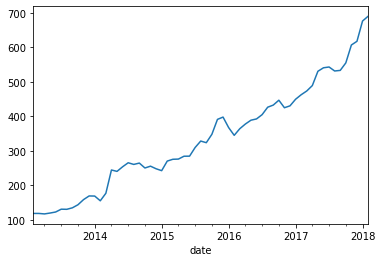

In [116]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

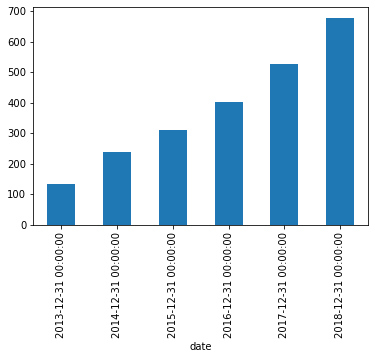

In [120]:
df2['close'].resample('Y').mean().plot(kind = 'bar')

In [118]:
df2['close'].resample('M').mean()

date
2013-02-28    119.026255
2013-03-31    119.006003
2013-04-30    117.636265
2013-05-31    120.152430
2013-06-30    123.175007
                 ...    
2017-10-31    554.749773
2017-11-30    606.606190
2017-12-31    617.286125
2018-01-31    675.965476
2018-02-28    689.823500
Freq: M, Name: close, Length: 61, dtype: float64

In [122]:
df2['close'].resample('M').sum()

date
2013-02-28     4999.1027
2013-03-31     7140.3602
2013-04-30     7763.9935
2013-05-31     7930.0604
2013-06-30     7390.5004
                 ...    
2017-10-31    48817.9800
2017-11-30    50954.9200
2017-12-31    49382.8900
2018-01-31    56781.1000
2018-02-28    13796.4700
Freq: M, Name: close, Length: 61, dtype: float64

In [140]:
# Multivariate Analysis
# Analyse whether stock prices of these tech companies (amazon,apple, google,microsoft) are correlated or not
Close = pd.DataFrame()
Apple = pd.read_csv(r'E:\Data Analysis\2-Time Series Data Analysis\individual_stocks_5yr/AAPL_data.csv')
Google =pd.read_csv(r'E:\Data Analysis\2-Time Series Data Analysis\individual_stocks_5yr/GOOG_data.csv')
Amazon =pd.read_csv(r'E:\Data Analysis\2-Time Series Data Analysis\individual_stocks_5yr/AMZN_data.csv')
Microsoft =pd.read_csv(r'E:\Data Analysis\2-Time Series Data Analysis\individual_stocks_5yr/MSFT_data.csv')


In [141]:
Close['Apple'] = Apple['close']
Close['Amazon']= Amazon['close']
Close['Google'] = Google['close']
Close['Microsoft'] =Microsoft['close']

In [142]:
Close

,Apple,Amazon,Google,Microsoft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


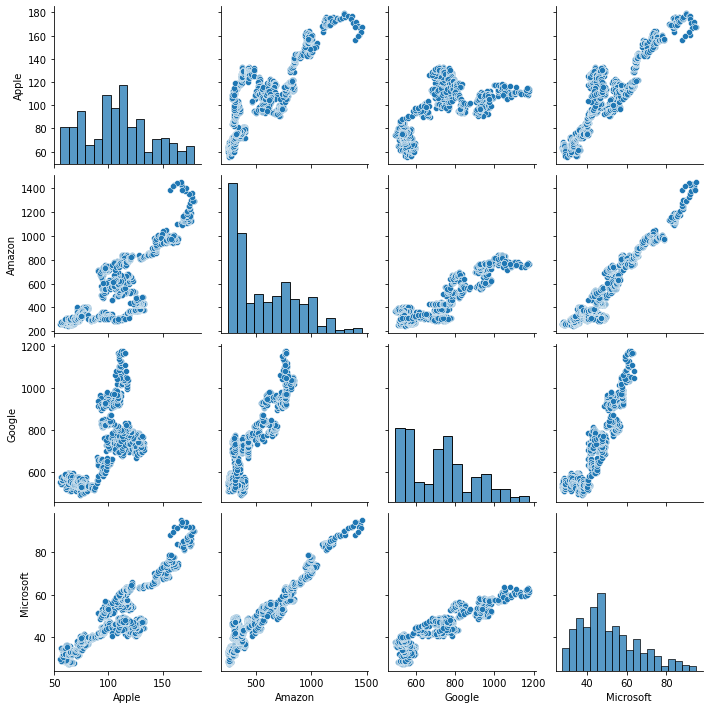

In [143]:
sns.pairplot(data = Close)

<AxesSubplot:>

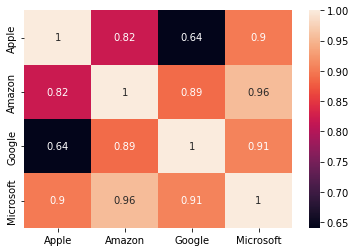

In [147]:
sns.heatmap(Close.corr(), annot = True)

In [157]:
data = pd.DataFrame()
data['appl_change'] = ((Apple['close']-Apple['open'])/Apple['close'])*100
data['goog_change'] = ((Google['close']-Google['open'])/Google['close'])*100
data['amzn_change'] = ((Amazon['close']-Amazon['open'])/Amazon['close'])*100
data['msft_change'] = ((Microsoft['close']-Microsoft['open'])/Microsoft['close'])*100

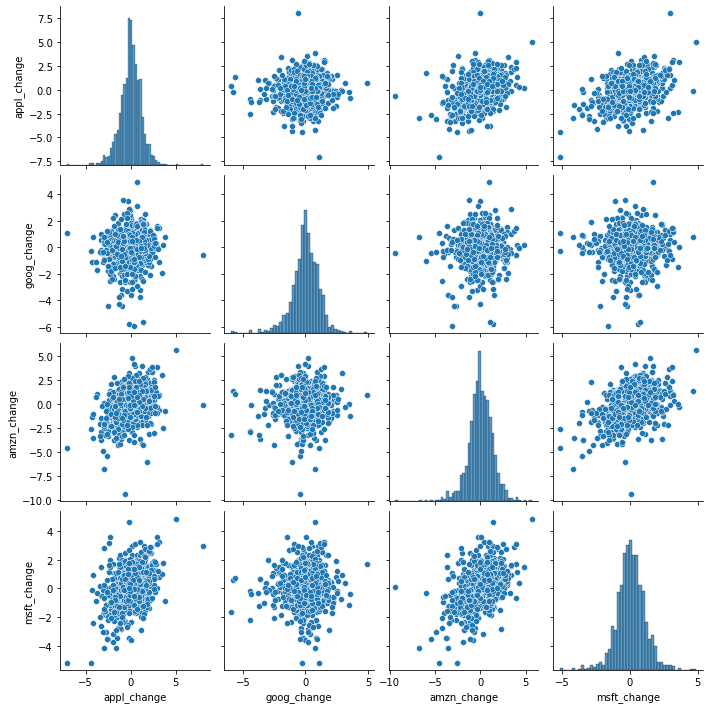

In [158]:
sns.pairplot(data=data)

<AxesSubplot:>

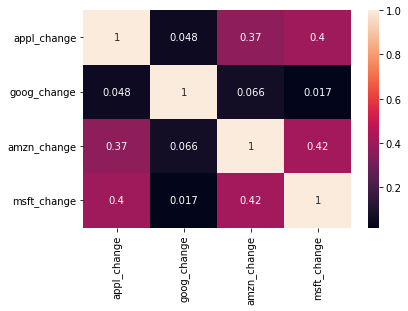

In [159]:
sns.heatmap(data.corr(),annot = True)

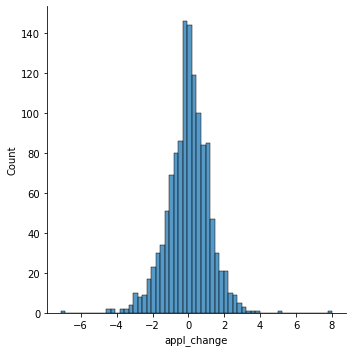

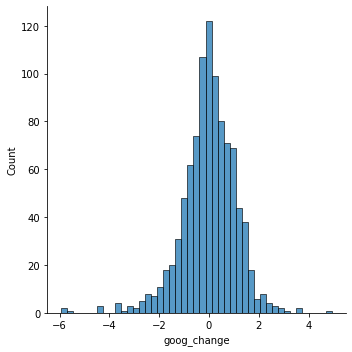

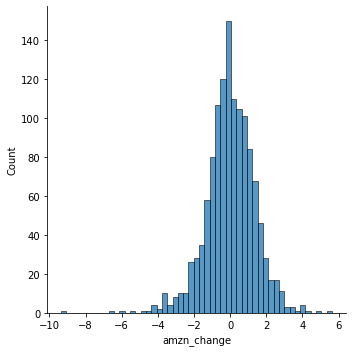

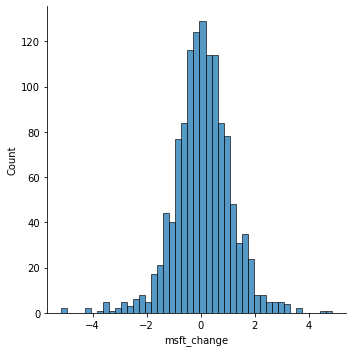

In [162]:
sns.displot(data['appl_change'])
sns.displot(data['goog_change'])
sns.displot(data['amzn_change'])
sns.displot(data['msft_change'])

In [171]:
data['appl_change'].std()

1.1871377131421237

In [172]:
data['appl_change'].quantile(0.25)

-0.6580209727800033

In [176]:
data.describe()

,appl_change,goog_change,amzn_change,msft_change
count,1259.000000,975.000000,1259.000000,1259.000000
mean,-0.000215,-0.012495,-0.000398,0.076404
std,1.187138,1.092560,1.358679,1.059260
min,-7.104299,-5.952266,-9.363077,-5.177618
25%,-0.658021,-0.551963,-0.738341,-0.509241
50%,0.042230,0.024951,-0.002623,0.061069
75%,0.715427,0.672649,0.852568,0.703264
max,8.000388,4.943550,5.640265,4.861491


In [177]:
Close.describe()

,Apple,Amazon,Google,Microsoft
count,1259.000000,1259.000000,975.000000,1259.000000
mean,109.066698,576.880041,725.403353,51.063081
std,30.556812,282.500395,166.420529,14.852117
min,55.789900,248.230000,492.550000,27.370000
25%,84.830650,325.800000,564.785000,40.310000
50%,109.010000,503.820000,720.640000,47.520000
75%,127.120000,777.420000,823.330000,59.730000
max,179.260000,1450.890000,1175.840000,95.010000
